## Chapter 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 3.4 and 3.14 (Quadrature Rule and Monte Carlo Quadrature)

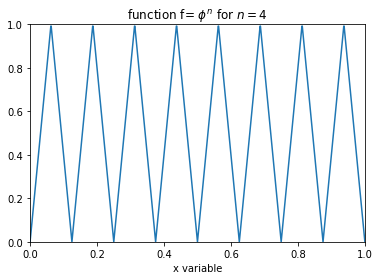

In [27]:
N = 4
n = np.arange(N+1)

I = 1000.
xgrid = np.arange(I+1)/I
xgrid0 = np.copy(xgrid)

a = 2.

for j in range(N):
    ind1 = np.where(xgrid < .5)
    ind2 = np.where(xgrid >= .5)
    xgrid[ind1] = a * xgrid[ind1]
    xgrid[ind2] = a - a * xgrid[ind2]
    
fig0 = plt.figure()
plt.plot(xgrid0,xgrid)
plt.title(r"function f= $\phi^n$ for $n=4$")
plt.xlabel("x variable")
plt.xlim([0.,1.])
plt.ylim([0.,1.])
plt.show()

In [45]:
N = 50
m = [10,20,40,60,80,100,200,400,600,800,1000,2500,5000,7500,10000,25000,50000,75000,100000,250000,500000,750000,1000000]
m = np.array(m)

errIM = np.zeros((m.shape[0]))
errMC = np.zeros((m.shape[0]))

i = 0
for mi in m:
    # grid points from implicit midpoint
    c = np.arange(1.,mi+1) / (2. * mi) - 1./(4.*mi)
    
    # Monte Carlo samples
    x = 1./2 * np.random.rand(mi)
    
    for j in range(N):
        ind1 = np.where(c < .5)
        ind2 = np.where(c >= .5)
        c[ind1] = a * c[ind1]
        c[ind2] = a - a * c[ind2]
        
        ind1 = np.where(x < .5)
        ind2 = np.where(x >= .5)
        x[ind1] = a * x[ind1]
        x[ind2] = a - a * x[ind2]
        
    errIM[i] = np.mean(c) - .5
    errMC[i] = np.mean(x) - .5
    
    i += 1

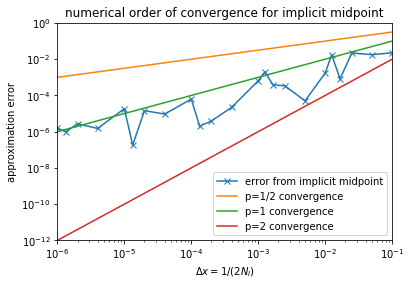

In [55]:
fig1 = plt.figure()
plt.loglog(1./m,np.abs(errIM),'x-',label="error from implicit midpoint")
plt.loglog(1./m,1./np.sqrt(m), label="p=1/2 convergence")
plt.loglog(1./m,1./m, label="p=1 convergence")
plt.loglog(1./m,1./m**2, label="p=2 convergence")
plt.xlim([1e-6,1e-1])
plt.ylim([1e-12,1e-0])
plt.legend()
plt.title("numerical order of convergence for implicit midpoint")
plt.xlabel(r"$\Delta x = 1/(2N_I)$")
plt.ylabel("approximation error")
plt.show()

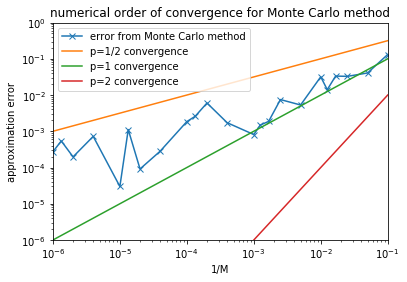

In [58]:
fig2 = plt.figure()
plt.loglog(1./m,np.abs(errMC),'x-',label="error from Monte Carlo method")
plt.loglog(1./m,1./np.sqrt(m), label="p=1/2 convergence")
plt.loglog(1./m,1./m, label="p=1 convergence")
plt.loglog(1./m,1./m**2, label="p=2 convergence")
plt.xlim([1e-6,1e-1])
plt.ylim([1e-6,1e-0])
plt.legend()
plt.title("numerical order of convergence for Monte Carlo method")
plt.xlabel(r"1/M")
plt.ylabel("approximation error")
plt.show()

### Example 3.6
The quadrature points and weights for the Hermite-Gauss quadrature of order 2 are respectively
$$c_{1,2} = \pm \frac{1}{2} \sqrt{2}, \qquad w_{1,2} = \frac{1}{2} \sqrt{\pi}.$$

(ref: http://mathworld.wolfram.com/Hermite-GaussQuadrature.html)

On the other hand,
$$ \mathbb{E}[\cos(x)] \approx \frac{1}{\sqrt{\pi}} \sum_{i=1}^{n} w_i \cos(\sqrt{2 \epsilon} x_i). $$

Therefore,
$$c^\prime_{1,2} = \pm 1, \qquad w^\prime_{1,2} = \frac{1}{2}.$$

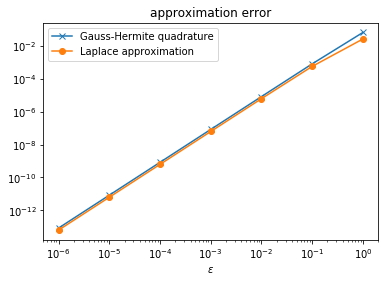

In [70]:
# Set quadrature points and weights for the Gauss-Hermite approximation.
c = np.array([-1.,1.])
w = np.array([.5,.5])

ep = []
IGH =[]
I = []
ILaplace = []

for i in range(7):
    eps = 10.**(-i)
    ep.append(eps)
    
    # Gauss-Hermite approximation
    IGH.append(np.sum(w*np.cos(np.sqrt(eps)*c)))
    
    # exact value
    I.append(np.exp(-eps/2))
    
    # Laplace approximation
    ILaplace.append(2./np.sqrt(1.+eps/2) - 1)
    
I = np.array(I)
IGH = np.array(IGH)
ILplace = np.array(ILaplace)

fig3 = plt.figure()
plt.loglog(ep,np.abs(I-IGH),'x-',label="Gauss-Hermite quadrature")
plt.loglog(ep,np.abs(I-ILaplace),'-o',label="Laplace approximation")
plt.xlabel(r"$\epsilon$")
plt.title("approximation error")
plt.legend()
plt.show()

### Example 3.21 (Importance Sampling)

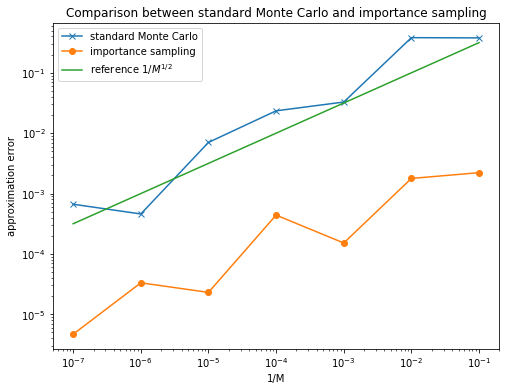

In [100]:
# For Expectation[exp(-10X) cos(X)]
n = np.arange(1,8)
n = np.array([10**i for i in n])
N = len(n)

# Exact value
Iexact = 10./101 - (10. * np.cos(1.) - np.sin(1.)) / (101. * np.exp(10.))

I1 = np.zeros((N))
I2 = np.zeros((N))

# Standard MC sampling
for i in range(N):
    x = np.random.rand(n[i])
    I1[i] = np.mean(np.cos(x) * np.exp(-10.*x))
    
# Importance sampling
for i in range(N):
    u = np.random.rand(n[i])
    x = -0.1 * np.log(1. - u + u * np.exp(-10.))
    I2[i] = np.mean(np.cos(x)) / 10. * (1. - np.exp(-10.))
    
fig4 = plt.figure(figsize=(8,6))
plt.loglog(1./n,np.abs(I1 - Iexact) / Iexact, '-x', label="standard Monte Carlo")
plt.loglog(1./n,np.abs(I2 - Iexact) / Iexact, '-o', label="importance sampling")
plt.loglog(1./n,1./np.sqrt(n), label=r"reference $1/M^{1/2}$")
plt.xlabel("1/M")
plt.ylabel("approximation error")
plt.title("Comparison between standard Monte Carlo and importance sampling")
plt.legend()
plt.show()

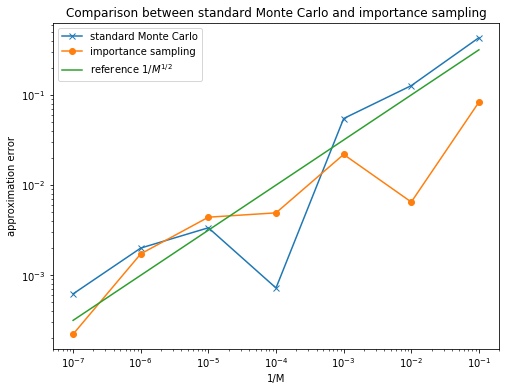

In [101]:
# For Expectation[exp(-10X) sin(X)]
n = np.arange(1,8)
n = np.array([10**i for i in n])
N = len(n)

# Exact value
Iexact = 1./101 - (np.cos(1.) + 10. * np.sin(1.)) / (101. * np.exp(10.))

I1 = np.zeros((N))
I2 = np.zeros((N))

# Standard MC sampling
for i in range(N):
    x = np.random.rand(n[i])
    I1[i] = np.mean(np.sin(x) * np.exp(-10.*x))
    
# Importance sampling
for i in range(N):
    u = np.random.rand(n[i])
    x = -0.1 * np.log(1. - u + u * np.exp(-10.))
    I2[i] = np.mean(np.sin(x)) / 10. * (1. - np.exp(-10.))
    
fig4 = plt.figure(figsize=(8,6))
plt.loglog(1./n,np.abs(I1 - Iexact) / Iexact, '-x', label="standard Monte Carlo")
plt.loglog(1./n,np.abs(I2 - Iexact) / Iexact, '-o', label="importance sampling")
plt.loglog(1./n,1./np.sqrt(n), label=r"reference $1/M^{1/2}$")
plt.xlabel("1/M")
plt.ylabel("approximation error")
plt.title("Comparison between standard Monte Carlo and importance sampling")
plt.legend()
plt.show()

### Example 3.24 (Rejection Sampling)

Rejection sampling requires the criterion that
$$ u < \frac{\pi_X(x)}{m \pi_P(x)}. $$
On the other hand, it is given (pg 87) that
$$ y = um\pi_P(x), \qquad f(x):= m\pi_P(x), \qquad g(x):= \pi_X(x). $$
So on the interval of $x \in [-1,1],$
$$ \sqrt{1- x_i^2} \geq 1 \times u_i, $$
$$ 1- x_i^2 \geq (u_i)^2.$$


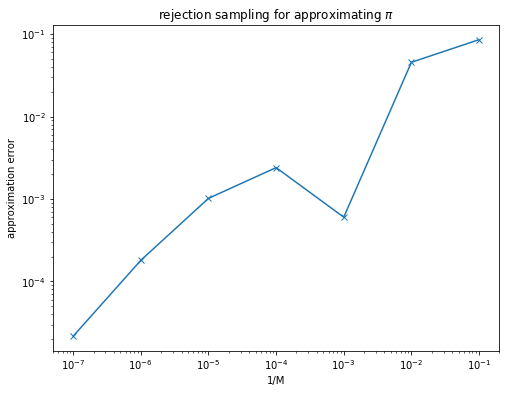

In [122]:
m = np.arange(1,8)
m = np.array([10**i for i in m])
M = len(m)

approx = np.zeros((M))

for j in range(M):
    # generate x values on interval [-1,1]
    x = 2. * np.random.rand(m[j]) - 1.
    # generate rhs
    y = np.random.rand(m[j])
    
    #check criterion
    ind = np.where((1.-x**2) >= (y**2))
    
    approx[j] = float(len(ind[0]))/m[j]
    
fig5 = plt.figure(figsize=(8,6))
plt.loglog(1./m, np.abs(approx - np.pi/4.), '-x')
plt.xlabel("1/M")
plt.ylabel("approximation error")
plt.title("rejection sampling for approximating $\pi$")
plt.show()

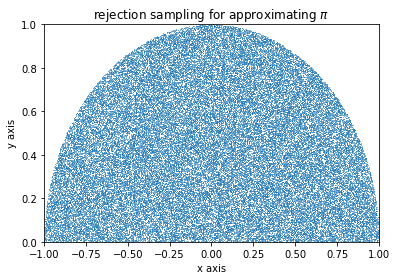

In [127]:
j = 4
x = 2. * np.random.rand(m[j]) - 1.
y = np.random.rand(m[j])

ind = np.where((1.-x**2) >= (y**2))
approx[j] = float(len(ind[0]))/m[j]

fig6 = plt.figure()
plt.plot(x[ind],y[ind],'x', ms=.2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("rejection sampling for approximating $\pi$")
plt.xlim([-1.,1.])
plt.ylim([0.,1.])
plt.show()

### Example 3.29 (Residual resampling)

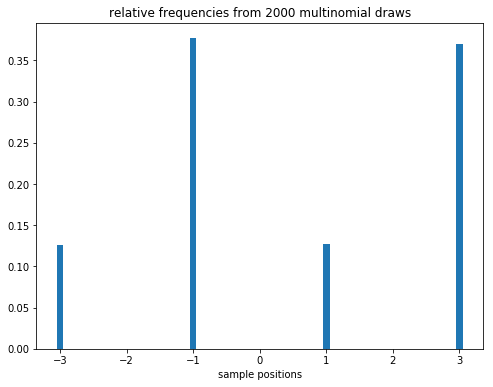

[0.125 0.375 0.125 0.375]
[0.1255 0.377  0.1275 0.37  ]


In [141]:
# weights
w = np.array([1.,3.,1.,3.])/8
# cumulative weights
W = np.array([1./8, 1./2, 5./8, 1.])

x = [-3., -1., 1., 3.]

# number of samples
M = 2000
xi = np.zeros((M))

for i in range(M):
    u = np.random.rand()
    j1 = 0
    
    while u > W[j1]:
        j1 += 1
    
    xi[i] = x[j1]
    
fig7 = plt.figure(figsize=(8,6))
nn, xh = np.histogram(xi)
nn = nn.astype("float")/np.sum(nn)

plt.bar([-3., -2., -1.5, -1., -0.5, 0.5, 1., 1.5, 2.0, 3.0], nn, width=0.1)
plt.xlabel("sample positions")
plt.title("relative frequencies from 2000 multinomial draws")
plt.show()

print(w)
print(nn[np.where(nn > 0.)])